# Вправа №1
Ця вправа стосується рівня участі в SAT.

A. Повторіть аналіз, використовуючи модифіковану z-оцінку.

Б. Повторіть аналіз, використовуючи тест Граббса. Застосуйте тест Граббса чотири рази, видаляючи на кожному кроці рядок даних з аномалією.

С. Ви знаходите однакові аномалії? Порівняйте знайдені аномалії, які отрмали при застосуванні z-оцінки, модифікованої z-оцінки, тесту Граббса.

D. Зробіть свої висновки.

#### Розв'язок #1

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# Завантаження даних
file_path = 'data/SAT_CT_District_Participation_2012.csv'
ct_test = pd.read_csv(file_path)

# Перегляд основної інформації
print(ct_test.shape)
print(ct_test.head())

(130, 2)
     District  Participation Rate
0     Ansonia                0.66
1        Avon                0.90
2      Berlin                0.81
3      Bethel                0.86
4  Bloomfield                0.81


In [2]:
# Перевірка на NaN та їх обробка
if ct_test.isnull().values.any():
    print("Warning: Dataset contains missing values. Filling with mean value.")
    ct_test['Participation Rate'] = ct_test['Participation Rate'].fillna(ct_test['Participation Rate'].mean())

In [4]:
# Обчислення середнього значення та стандартного відхилення
mean_rate = ct_test['Participation Rate'].mean()
stdev_rate = ct_test['Participation Rate'].std(ddof=0)

print(f'Середній рівень участі: {mean_rate:.3f}')
print(f'Стандартне відхилення: {stdev_rate:.3f}')

Середній рівень участі: 0.741
Стандартне відхилення: 0.136


In [ ]:
# Обчислення z-оцінки
zscore_rate = ss.zscore(ct_test['Participation Rate'], ddof=0)
ct_test = ct_test.assign(zscore=zscore_rate)

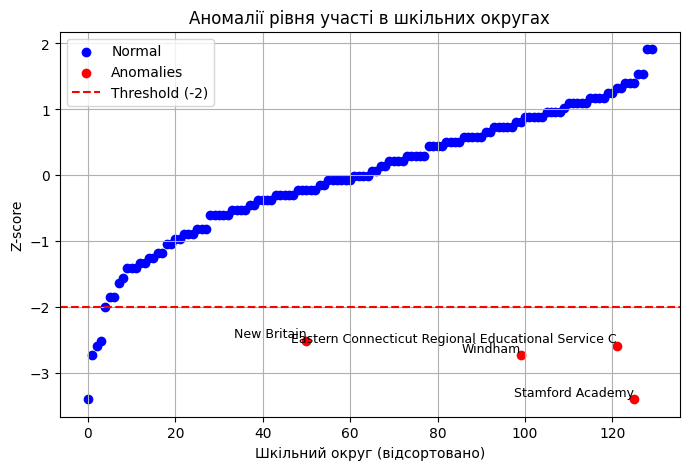

In [ ]:
# Функція для візуалізації аномалій
def plot_anomaly(data, threshold):
    plt.figure(figsize=(8, 5), dpi=100)
    sorted_data = data.sort_values(by='zscore')

    plt.scatter(range(len(sorted_data)), sorted_data['zscore'], c='blue', label='Normal')
    outliers = sorted_data[sorted_data['zscore'] < threshold]
    plt.scatter(outliers.index, outliers['zscore'], c='red', label='Anomalies')

    # Додаємо підписи для аномалій
    for i, row in outliers.iterrows():
        plt.text(i, row['zscore'], row['District'], fontsize=9, verticalalignment='bottom', horizontalalignment='right')

    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold (-2)')
    plt.xlabel('Шкільний округ (відсортовано)')
    plt.ylabel('Z-score')
    plt.title('Аномалії рівня участі в шкільних округах')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_anomaly(ct_test, -2)

In [7]:
# Виявлення аномалій
zscore_anomalies = ct_test[ct_test['zscore'] < -2]

# Вивід результату у відформатованому вигляді
print("\nАномальні райони (z-score < -2):")
print(zscore_anomalies[['District', 'Participation Rate', 'zscore']].to_string(index=False))


Аномальні райони (z-score < -2):
                                          District  Participation Rate    zscore
                                       New Britain                0.40 -2.510660
                                           Windham                0.37 -2.731839
Eastern Connecticut Regional Educational Service C                0.39 -2.584386
                                  Stamford Academy                0.28 -3.395374
